## Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# np.random.seed(6)
import math

In [2]:
nX=[[14, 5], [16, 5], [6, 0], [10, 1], [8, 2], [15, 6], [15, 7], [8, 2], [8, 1], [15, 4]]  #Lab demo
# nX=[[12, 6], [16, 8], [5, 1], [13, 4], [10, 4], [14, 7], [15, 9], [10, 4], [9, 3], [15, 6]]  #  good data
X=np.array(nX)
y=np.array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1])
print(X)
print(y)

[[14  5]
 [16  5]
 [ 6  0]
 [10  1]
 [ 8  2]
 [15  6]
 [15  7]
 [ 8  2]
 [ 8  1]
 [15  4]]
[1 1 0 0 0 1 1 0 0 1]


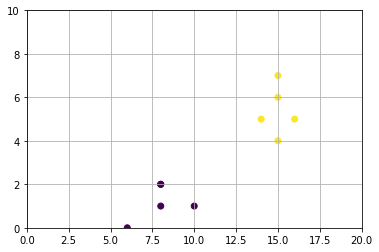

In [3]:
plt.scatter(X[:,0],X[:,1],marker='o',c=y)

plt.grid() 
plt.xlim(0,20)
plt.ylim(0,10)
plt.show()

In [4]:
X.shape

(10, 2)

#### Subtracting mean

In [5]:
avg=X.mean(axis=0)
print(avg)

[11.5  3.3]


In [6]:
trainset=X-avg
print(trainset)
print(y)

[[ 2.5  1.7]
 [ 4.5  1.7]
 [-5.5 -3.3]
 [-1.5 -2.3]
 [-3.5 -1.3]
 [ 3.5  2.7]
 [ 3.5  3.7]
 [-3.5 -1.3]
 [-3.5 -2.3]
 [ 3.5  0.7]]
[1 1 0 0 0 1 1 0 0 1]


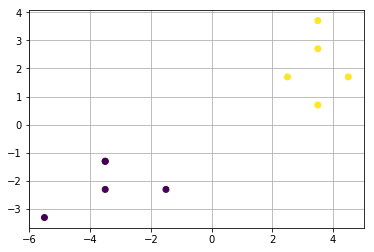

In [7]:
plt.scatter(trainset[:,0],trainset[:,1],marker='o',c=y)
plt.grid()
plt.show()

In [8]:
trainset.shape

(10, 2)

#### Calculating Covariance Matrix

\begin{equation*}
covM=
\begin{pmatrix}
cov(x,x) & cov(x,y)\\
cov(y,x) & cov(y,y) 
\end{pmatrix}
\end{equation*}

\begin{equation*}
cov(x,y)= \frac{1}{n-1}  \sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})
\end{equation*}

<!---
\begin{equation*}
X^\top Y   =  \sum_{i=1}^{n}x_{i}y_{i}
\end{equation*}
--->

We can calcualte covariance matrix using dot product. <br>
\begin{equation*}
Calculate \space average = \bar{X} \\
X=X- \bar{X} \\
covM=dot(\space X.T, \space X)  \space /  \space (len(X) -1 )
\end{equation*}

In [9]:
covM=np.dot(trainset.T, trainset) /( len(trainset) -1 )
print('Covariance Matrix:\n ', covM)

Covariance Matrix:
  [[14.72222222  8.38888889]
 [ 8.38888889  5.78888889]]


#### Covariance Matrix using Numpy

In [10]:
np.cov(trainset.T)

array([[14.72222222,  8.38888889],
       [ 8.38888889,  5.78888889]])

#### Finding Eigenvalue and Eigenvector


\begin{equation*}
Ax=\lambda x\\
where   \;x:=eigenvector  \;and \; \lambda:=corresponding  \;eigenvalue \\
note: length \space of \space eigenvector=1
\end{equation*}


In [11]:
e,EV=np.linalg.eigh(covM)	#eigenvalues & eigenvectors

In [12]:
print(e)

[ 0.75163174 19.75947937]


In [13]:
e=e[::-1] #reverse.  to bring the larger value first.
EV=EV[::-1] #reverse.

In [14]:
print('eigenvalue: ',e[0], 'eigenvector: ',EV[0])
print('eigenvalue: ',e[1], 'eigenvector: ',EV[1])

eigenvalue:  19.75947937160304 eigenvector:  [-0.85731596 -0.51479058]
eigenvalue:  0.7516317395080718 eigenvector:  [ 0.51479058 -0.85731596]


In [15]:
fc=(e[0]/(e[0]+e[1]))*100
sc=(e[1]/(e[0]+e[1]))*100
print('PC1 contribution: ',fc,' PC2 contribution: ',sc)

PC1 contribution:  96.335489894056  PC2 contribution:  3.6645101059440126


### Plotting Eigenvectors

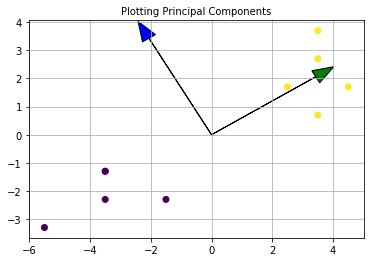

In [16]:
ax = plt.axes()
ax.scatter(trainset[:,0],trainset[:,1],marker='o',c=y) #drawing the points.

s=4  #arraw scale.
ax.arrow(0,0,  -EV[0][0]*s,  -EV[0][1]*s, head_width=0.5, head_length=0.7, fc='green', ec='black')
ax.arrow(0,0,   -EV[1][0]*s,   -EV[1][1]*s, head_width=0.5, head_length=0.7, fc='blue', ec='black')

plt.grid()
plt.title('Plotting Principal Components',fontsize=10)
plt.show()

#### Projecting data on the new dimensions

\begin{equation*}
\bar{x} .\bar{E} = x*E*cos(\theta) \\
So, x*cos(\theta) = \frac{\bar{x} .\bar{E}}{E} \\
\bar{E} \space is \space an \space eigenvector, so \space E=1 \\
So, x*cos(\theta) = \bar{x} .\bar{E} \\
So, projection \space of \space x \space onto \space \bar{E} = x*cos(\theta) =\bar{x} .\bar{E}
\end{equation*}

In [17]:
proj=np.dot(trainset, EV.T)
print(proj)

[[-3.01843389e+00 -1.70460691e-01]
 [-4.73306582e+00  8.59120466e-01]
 [ 6.41404671e+00 -2.20550373e-03]
 [ 2.46999227e+00  1.19964085e+00]
 [ 3.66983362e+00 -6.87256273e-01]
 [-4.39054043e+00 -5.12986075e-01]
 [-4.90533101e+00 -1.37030204e+00]
 [ 3.66983362e+00 -6.87256273e-01]
 [ 4.18462420e+00  1.70059690e-01]
 [-3.36095928e+00  1.20164585e+00]]


In [18]:
#without dot product.
pc=[]
for x in trainset:
    pc1=np.dot(EV[0], x)
    pc2=np.dot(EV[1], x)
    pc.append([pc1,pc2])
pc=np.array(pc)
print(pc)

[[-3.01843389e+00 -1.70460691e-01]
 [-4.73306582e+00  8.59120466e-01]
 [ 6.41404671e+00 -2.20550373e-03]
 [ 2.46999227e+00  1.19964085e+00]
 [ 3.66983362e+00 -6.87256273e-01]
 [-4.39054043e+00 -5.12986075e-01]
 [-4.90533101e+00 -1.37030204e+00]
 [ 3.66983362e+00 -6.87256273e-01]
 [ 4.18462420e+00  1.70059690e-01]
 [-3.36095928e+00  1.20164585e+00]]


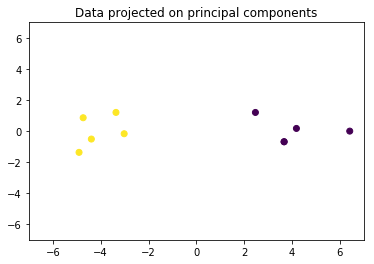

In [19]:
plt.scatter(pc[:,0],pc[:,1]  ,marker='o',c=y)
plt.title('Data projected on principal components')
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.show()

#### Dimentionality Reduction: Taking only first principal component( which holds around 96% information for the given data)

In [20]:
print(pc[:,0])

[-3.01843389 -4.73306582  6.41404671  2.46999227  3.66983362 -4.39054043
 -4.90533101  3.66983362  4.1846242  -3.36095928]


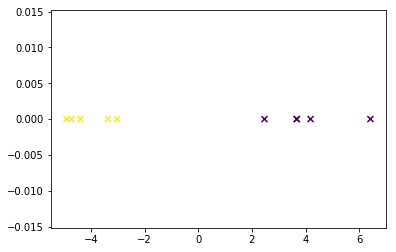

In [21]:
#Plotting the 1 dimentional data.
ar=pc[:,0].copy()
val=0
plt.scatter(ar, np.zeros_like(ar) + val , marker='x' ,c=y )
plt.show()

### Reconstructing Data

\begin{equation*}
\boxed{\text{PCA reconstruction} = \text{Mean} + \text{Projection on PC1} \cdot \text{Eigenvector1}   + \text{Projection on PC2} \cdot \text{Eigenvector2}  +\text{...}  }
\end{equation*}

The first pc contains maximum info and the 2nd pc contains much less inf. Its possible to construct back the data.
If we use all the principal components we can get the same original data. If we use first few pc we can get most likely to the origin data.

In [22]:
#Reconstructing data.
# np.dot(pc, EV)
# print(pc[:,0].shape)

fpc1=pc[:,0]
fpc2=pc[:,1]
rows=[]
for p,p2 in zip(fpc1, fpc2):
    contribution_1=p*EV[0]
    contribution_2=p2*EV[1]
    row=avg+contribution_1+contribution_2
#     row=avg+contribution_1
    rows.append(row)
    print(row)
rows=np.array(rows)

[14.  5.]
[16.  5.]
[ 6.00000000e+00 -3.96817995e-17]
[10.  1.]
[8. 2.]
[15.  6.]
[15.  7.]
[8. 2.]
[8. 1.]
[15.  4.]


In [23]:
print( EV.shape )
print(pc.shape)

(2, 2)
(10, 2)


In [24]:
np.dot(pc, EV)+avg

array([[14.,  5.],
       [16.,  5.],
       [ 6.,  0.],
       [10.,  1.],
       [ 8.,  2.],
       [15.,  6.],
       [15.,  7.],
       [ 8.,  2.],
       [ 8.,  1.],
       [15.,  4.]])

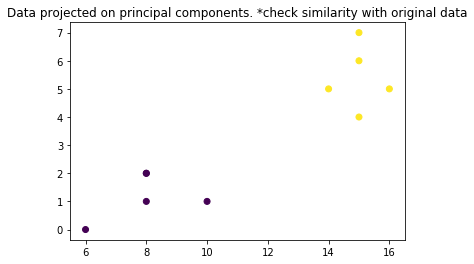

In [28]:
plt.scatter(rows[:,0],rows[:,1]  ,marker='o',c=y)
plt.title('Data projected on principal components. *check similarity with original data')
plt.show()

### Helper

In [27]:
A = np.array([[1, 3], [5, 4], [3, 8]])
A
EX=np.array([ [10, 5, 3], [15, 4, 2], [8, 8,1] ])
print(EX)

[[10  5  3]
 [15  4  2]
 [ 8  8  1]]


In [28]:
np.cov(EX, rowvar=False )

array([[13.        , -6.5       ,  1.        ],
       [-6.5       ,  4.33333333, -1.5       ],
       [ 1.        , -1.5       ,  1.        ]])

In [29]:
def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]-1
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance

In [30]:
covM=calculateCovariance(A)
print(covM)

[[4. 1.]
 [1. 7.]]


In [31]:
e,EV=np.linalg.eigh(covM)	#eigenvalues & eigenvectors
print(e)
print(EV)

[3.69722436 7.30277564]
[[-0.95709203  0.28978415]
 [ 0.28978415  0.95709203]]


In [32]:
ex=[ [ 10, 5, 3],
  [15, 4, 2],
  [8, 8, 1] ]

ex=[ [ 10, 5],
  [15, 4],
  [8, 8] ]
ex=np.array(ex)

In [33]:
ex

array([[10,  5],
       [15,  4],
       [ 8,  8]])

In [34]:
avg=ex.mean(axis=0)
ex=ex-avg
print(ex)

[[-1.         -0.66666667]
 [ 4.         -1.66666667]
 [-3.          2.33333333]]


In [35]:
covm=np.cov(ex.T)
print(covm)

[[13.         -6.5       ]
 [-6.5         4.33333333]]


In [36]:
np.dot(ex.T, ex)/2

array([[13.        , -6.5       ],
       [-6.5       ,  4.33333333]])

In [37]:
e,EV=np.linalg.eigh(covm)	#eigenvalues & eigenvectors

In [38]:
print(e)
print(EV)

[ 0.8546389  16.47869443]
[[-0.47185793 -0.8816746 ]
 [-0.8816746   0.47185793]]


In [41]:
# e[2]/sum(e)

In [42]:
print(3.25757251e-16)

3.25757251e-16
